# What is Agentic AI?

## Agenda
    1. Pydantic (data validation)
    2. Langgraph + Langsmith
    3. Work flows using Langgraph
    4. RAG using Langgraph

## Pydantic

    1. Pydantic is a just validation
    2. it is used to validate the response from the api or api input
    3. pydanti backend completely return in *RUST*, so it is very fast
    
### Why pydantic is required in Langgraph?
    1. langgraph is framework where we create a complex workflows, and where we automate complex workflows
    ex:
        1. i upload a youtube video -> something should trigger --> read the content --> llm call --> create 
        2. whenever every node is going to executed. for ex: i am expecting output title and description
                1. title -> i am expecting integer
                2. description i am expecting as a string. These are generated by LLM
                3. these things inherited by *Pydantic*
                4. Whenever you want a structured output....so you should use Pydantic to get the structured output

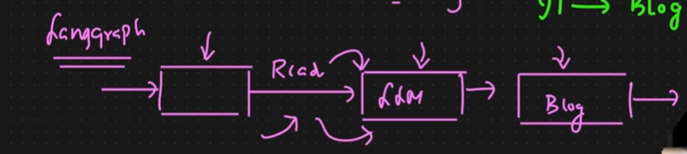

Here the node is basically a each box

# Pydantic

Pydantic models are foundation of data validations in Python. They use python type annotations yo define the structure and validate data at runtime.

In [ ]:
# !pip show pydantic

In [ ]:
from pydantic import BaseModel # performs the data validations

class Person(BaseModel):
    name: str
    age: int
    city: str

person = Person(name = "raju",age = 27,city = "hyd")
print(person)
print(type(person))

## pydantic alternate

In [ ]:
from dataclasses import dataclass

@dataclass
class Person:
    name: str
    age: int
    city: str

person = Person(name = "raju",age = 27,city = "hyd")
print(person)
print(type(person))

## what is difference between BaseModel and dataclass

In [ ]:
from pydantic import BaseModel # performs the data validations

class Person(BaseModel):
    name: str
    age: int
    city: str

# Here the city i changed to int so that i will get validation error
person1 = Person(name = "raju",age = 27,city = 123)
print(person1)
print(type(person1))

In [ ]:
from dataclasses import dataclass

@dataclass
class Person:
    name: str
    age: int
    city: str

# Here i changed city str to int but still i am not getting the Validation error
person2 = Person(name = "raju",age = 27,city = 12)
print(person2)
print(type(person2))

## Model with Optional Fields

In [ ]:
from pydantic import BaseModel # performs the data validations
from typing import Optional


class Employee(BaseModel):
    id: int
    name: str
    department: str
    salary: Optional[float] = None # Optional with default value is None
    is_active: Optional[bool] = True # Optional with default value is True


employee =Employee(id=1,name="raju",department="IT")
print(employee)
print(type(employee))

In [ ]:
employee1 =Employee(id=1,name="raju",department="IT",salary=1000, is_active=False)
print(employee1)
print(type(employee1))

## List values

In [2]:
from pydantic import BaseModel
from typing import List

class ClassRoom(BaseModel):
    room_number: str
    students: List[str]
    capacity: int

In [3]:
data = {
    "room_number": "1",
    "students": ("a", "n", "r"),
    "capacity": 3
}
c = ClassRoom(**data)
print(c, type(c))

room_number='1' students=['a', 'n', 'r'] capacity=3 <class '__main__.ClassRoom'>


In [4]:
c = ClassRoom(room_number="A1", students=['a', 'b'], capacity=2)
print(c, type(c))

room_number='A1' students=['a', 'b'] capacity=2 <class '__main__.ClassRoom'>


In [6]:
try:
    invalid_val = ClassRoom(room_number=1, students=["a", "b"], capacity=2)
except ValueError as e:
    print(e)
    

1 validation error for ClassRoom
room_number
  Input should be a valid string [type=string_type, input_value=1, input_type=int]
    For further information visit https://errors.pydantic.dev/2.11/v/string_type


## Pydantic Models with Nested Models

create complex structures with nested models:

In [7]:
from pydantic import BaseModel

class Address(BaseModel):
    street: str
    city: str
    zip_code: str

# creating a nested model
class Customer(BaseModel):
    customer_id: int
    name: str
    address: Address # nested model, this address contains above 3 values like street, city, zip_code


# create instance
customer = Customer(
    customer_id=1,
    name="Raju",
    address={"street": "abc 123", "city": "Hyd", "zip_code": "123456"}
)

print(customer)

customer_id=1 name='Raju' address=Address(street='abc 123', city='Hyd', zip_code='123456')


In [8]:
# create instance\
# change the adddress value street as int
customer1 = Customer(
    customer_id=1,
    name="Raju",
    address={"street": 123, "city": "Hyd", "zip_code": "123456"}
)

print(customer1)

ValidationError: 1 validation error for Customer
address.street
  Input should be a valid string [type=string_type, input_value=123, input_type=int]
    For further information visit https://errors.pydantic.dev/2.11/v/string_type

## Pydantic Fields: Customization and Constraints

The Field function in Pydantic enhances model fields beyond basic type hints by allowing you to specify validation rules, default values, aliases, and more.

In [ ]:
from pydantic import BaseModel, Field

class Item(BaseModel):
    name:str=Field(min_length=2, max_length=15)
    price:float=Field(gt=0,le=1000) # greaterthan 0 and lessthan or equal to 1000
    quantity:int=Field(ge=0) # greaterthan or equal 0

In [10]:
item = Item(name="Book", price=29.99, quantity=10)
print(item)

name='Book' price=29.99 quantity=10


In [20]:
# if i  price to -1 we will get a validation error
item = Item(name="Book", price=-1, quantity=10)
print(item)

ValidationError: 1 validation error for Item
price
  Input should be greater than 0 [type=greater_than, input_value=-1, input_type=int]
    For further information visit https://errors.pydantic.dev/2.11/v/greater_than

In [21]:
from pydantic import BaseModel

class User(BaseModel):
    username: str = Field(..., description="Unique username for the user")
    age: int = Field(default=18, description="User age default to 18")
    email:str = Field(default_factory=lambda: "user@example.com", description="default email address")

# Examples
user1 = User(username="raju")
print(user1) # username='raju', age=18, email='user@example.com'

username='raju' age=18 email='user@example.com'


In [22]:
# example 2

user2 = User(username="balu", age=25, email="balu@gmail.com")
print(user2)

username='balu' age=25 email='balu@gmail.com'


In [23]:
# let's check user schema

print(User.schema())

{'properties': {'username': {'description': 'Unique username for the user', 'title': 'Username', 'type': 'string'}, 'age': {'default': 18, 'description': 'User age default to 18', 'title': 'Age', 'type': 'integer'}, 'email': {'description': 'default email address', 'title': 'Email', 'type': 'string'}}, 'required': ['username'], 'title': 'User', 'type': 'object'}


C:\Users\virub\AppData\Local\Temp\ipykernel_25084\2775381053.py:3: PydanticDeprecatedSince20: The `schema` method is deprecated; use `model_json_schema` instead. Deprecated in Pydantic V2.0 to be removed in V3.0. See Pydantic V2 Migration Guide at https://errors.pydantic.dev/2.11/migration/
  print(User.schema())


In [24]:
print(User.model_json_schema())

{'properties': {'username': {'description': 'Unique username for the user', 'title': 'Username', 'type': 'string'}, 'age': {'default': 18, 'description': 'User age default to 18', 'title': 'Age', 'type': 'integer'}, 'email': {'description': 'default email address', 'title': 'Email', 'type': 'string'}}, 'required': ['username'], 'title': 'User', 'type': 'object'}
